In [39]:
import tensorflow as tf
import matplotlib.pyplot as pt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import cv2 as cv

In [3]:
mnist = tf.keras.datasets.mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_test.shape

(10000, 28, 28)

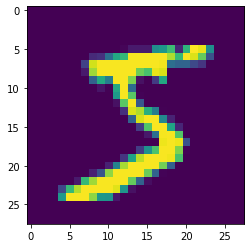

In [7]:
pt.imshow(x_train[0])
pt.show()

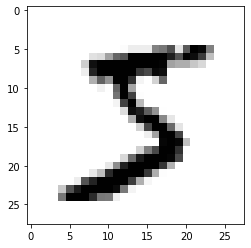

In [8]:
pt.imshow(x_train[0],cmap=pt.cm.binary)
pt.show()

In [9]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

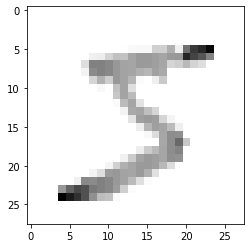

In [10]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)
pt.imshow(x_train[0],cmap=pt.cm.binary)
pt.show()

In [11]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(y_train[0])  #label

5


In [15]:
img_size=28
x_train_arr=np.array(x_train).reshape(-1,img_size,img_size,1)#increasing 1 dimension
x_test_arr=np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training Sample Solution",x_train_arr.shape)
print("Testing Sample Solution",x_test_arr.shape)

Training Sample Solution (60000, 28, 28, 1)
Testing Sample Solution (10000, 28, 28, 1)


In [18]:
#Creating neural network
model=Sequential()

#first convolutional layer
model.add(Conv2D(64,(3,3),input_shape=x_train_arr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#fully connected layers 1
model.add(Flatten()) #2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#fully connected layers 2
model.add(Dense(32))
model.add(Activation("relu"))

#last fully connected layers, must have 10 classes (0-9)
model.add(Dense(10)) #last dense function must be 10
model.add(Activation("softmax")) #(Class probabilities)



In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)         

In [20]:
#compiling model
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [24]:
#training
model.fit(x_train_arr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 46s 34ms/step - loss: 0.3645 - accuracy: 0.8850 - val_loss: 0.1724 - val_accuracy: 0.9477
Epoch 2/5
1313/1313 [==============================] - 47s 35ms/step - loss: 0.1135 - accuracy: 0.9655 - val_loss: 0.0999 - val_accuracy: 0.9699
Epoch 3/5
1313/1313 [==============================] - 52s 40ms/step - loss: 0.0810 - accuracy: 0.9748 - val_loss: 0.0930 - val_accuracy: 0.9701
Epoch 4/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0621 - accuracy: 0.9810 - val_loss: 0.0851 - val_accuracy: 0.9744
Epoch 5/5
1313/1313 [==============================] - 42s 32ms/step - loss: 0.0522 - accuracy: 0.9835 - val_loss: 0.0713 - val_accuracy: 0.9786


In [27]:
#Evaluation
test_loss,test_acc=model.evaluate(x_test_arr,y_test)
print("Test loss on 10000 dataset",test_loss)
print("validation Accuracy on 10000 dataset",test_acc)

313/313 [==============================] - 3s 11ms/step - loss: 0.0640 - accuracy: 0.9815
Test loss on 10000 dataset 0.06395510584115982
validation Accuracy on 10000 dataset 0.9815000295639038


In [28]:
#Prediction
prediction=model.predict([x_test_arr])

In [29]:
print(prediction)

[[5.37528209e-08 3.70097517e-08 1.28900465e-05 ... 9.99981880e-01
  1.02241540e-08 5.02657713e-06]
 [4.79003531e-04 4.12761074e-05 9.98522460e-01 ... 2.20646732e-04
  3.40740226e-05 9.92985078e-05]
 [1.27880812e-05 9.99183357e-01 5.80018559e-06 ... 4.01942452e-05
  3.67831453e-05 2.36255983e-05]
 ...
 [1.03395736e-09 4.69757697e-06 3.84205165e-08 ... 1.61321611e-06
  4.85681085e-07 5.84568306e-06]
 [2.84410703e-06 2.65773139e-07 9.73790293e-08 ... 2.65104222e-06
  4.51457949e-04 3.18864804e-05]
 [4.98906193e-05 3.55053544e-06 3.14499594e-05 ... 3.62987362e-06
  3.63823856e-05 7.57424787e-05]]


In [30]:
#converting prdiction from one hot encoding
print(np.argmax(prediction[0])) #returning maximum value index

7


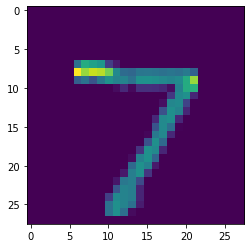

In [35]:
#checking on 0 index
plt.imshow(x_test[0])

In [36]:
#trying on random value
print(np.argmax(prediction[116]))

4


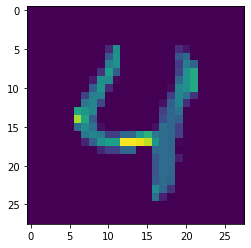

In [37]:
#checking on 4 index
plt.imshow(x_test[4])

In [96]:
#loading image
img=cv.imread('8.png')

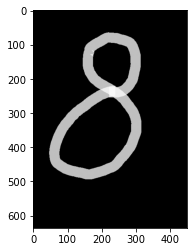

In [97]:
plt.imshow(img)

In [98]:
img.shape

(636, 449, 3)

In [99]:
#converting to grayscale image
gray=cv.cvtColor(img,cv.COLOR_BGR2GRAY)

In [100]:
gray.shape

(636, 449)

In [101]:
resized=cv.resize(gray,(28,28),interpolation=cv.INTER_AREA)

In [102]:
resized.shape

(28, 28)

In [103]:
newimg=tf.keras.utils.normalize(resized,axis=1) #0-1 scaling

In [104]:
newimg=np.array(newimg).reshape(-1,img_size, img_size,1)

In [105]:
newimg.shape

(1, 28, 28, 1)

In [106]:
predictions=model.predict(newimg)

In [107]:
print(np.argmax(predictions))

8
